# Group: Andrew Karam, Nikhil Kotta

# Outline

# 1. Introduction
   
   ## 1.1 Background Information
   ## 1.2 Libraries Used

# 2. Data Processing
   
   ## 2.1 Subset of Data
   ## 2.2 Loading Data

# 3. Visual Representation

# 4 Machine Learning Model;
   ## 4.1 Machine Learning Data Set
   ## 4.2 Linear Regression Model
   
# 5 Conclusion

# 1 Introduction

After finishing the project 3 on Life Expectancies in different continents, both Andrew Karam and I felt that we wanted to find a new data set still regarding Life Expectancy. Furthermore, we were able to find a data set that also involves many other interesting subsections that factor into one's life expectancy and ultimately the country's life expectancy as well. 


# 1.1 Background Information

It is interesting to note the mortality rate in 2021 because of COVID-19 and the effects it has had on our society. Therefore, it was really hard to make a relationship between life expectancies and anything else other than COVID 19 in the recent 2 years. According to  the World Health Organization by the year of 2021 there will have been 5.3 million deaths accounted for. 

So, we decided to grab data from the year of 2014 when COVID 19 was not a major reason for the deaths in this world. When researching this particular data set for the sub section of 2014 we realized that this was a year where the life expectancy dropped by over 50 years. Furthermore when Anderson from NPR says, “When you see increases in so many of the leading causes of death, it's difficult to pinpoint one particular cause as the culprit” I realized this was the proper year to analyze in our project .

# 1.2 Libraries Used

 We have used multiple libraries ro help us with this project in terms of visual representation of our data, organize data, and to create our machine learning model to train our data set. For instance in order to replicate this project you will need to import Numpy,Pandas,Seaborn,Sklearn for the visual representation and to organize the data . FOr the macine learning model of our data set you will need to import sklearn.model_selection, and sklearn.linear_model. 


# 1.3 Hypothesis
We believe that there is a correlation between life expectancy and the given variables: schooling, alchohol, diseases.

# 2  Data Processing 

After checking the data We decided to limit the columns of data that were given in the original data set. Consequently we have decided to use the columns of Countries,Life Expectancies, Alcohol consumption(litres of alcohol),Status(Developing vs Developed),Year,Hepatitis B, Measles, BMI,Polio,HIV/AIDS, GDP,Population, and Schooling. This includes the 181 countries that are included in the data set. We scraped the data from kaggle at https://www.kaggle.com/kumarajarshi/life-expectancy-who.  The data was collected from the repository in the World Health Organization(WHO). Many countries were very likely to be unknown in the data set we chose so some of the values such as Schooling and Alcohol rates. Furthermore, we dropped these columns from the data set to get a more accurate representation in our visualization of the data.


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

warnings. filterwarnings('ignore')

df = pd.read_csv("Life Expectancy Data.csv")

df = df.loc[df['Year'] == 2014]

df.rename(columns = {"Life expectancy ": "Life expectancy", "Measles ": "Measles", " HIV/AIDS": "HIV/AIDS", "Diphtheria ": "Diphtheria", " BMI ": "BMI", 'under-five deaths ':  'under-five deaths'}, inplace=True)

df = df.reset_index(drop=True)

nan_value = float("NaN")

df.replace("", nan_value, inplace=True)

df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
2,Algeria,2014,Developing,75.4,11.0,21,0.01,54.237318,95.0,0,...,95.0,7.21,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
3,Angola,2014,Developing,51.7,348.0,67,8.33,23.965612,64.0,11699,...,68.0,3.31,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4
4,Antigua and Barbuda,2014,Developing,76.2,131.0,0,8.56,2422.999774,99.0,0,...,96.0,5.54,99.0,0.2,12888.296670,NaN,3.3,3.3,0.782,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),2014,Developing,73.9,158.0,9,6.47,0.000000,78.0,0,...,79.0,5.26,78.0,0.1,NaN,NaN,1.6,1.5,0.771,14.2
179,Viet Nam,2014,Developing,75.9,128.0,28,4.09,0.000000,95.0,15033,...,96.0,7.70,95.0,0.1,NaN,NaN,14.3,14.7,0.675,12.5
180,Yemen,2014,Developing,65.4,228.0,37,0.01,0.000000,73.0,815,...,67.0,5.64,73.0,0.1,NaN,NaN,13.7,13.5,0.500,9.0
181,Zambia,2014,Developing,61.1,314.0,28,0.01,196.667577,86.0,9,...,78.0,4.99,86.0,4.3,1738.882200,1562974.0,6.3,6.2,0.570,12.5


## 2.1 Subset of Data

After analyzing the data set the columns shown above proved to be the variables that we chose to represent how we display our life expectancy against. Each column is either important on its own or will prove to be important when paired with other variables. For instance the diseases will be compared against each other in life expectancy to conclude a correlation in the end.



## 2.2 Loading Data 
We chose to use a pandas data frame to represent our data set and manipulate it further to show different representations. Furthermore this data set will be divided into smaller pieces for further analysis in further parts of the project.




In [21]:
#Dropping percentage expenditure total expedniture, Thiness 1-19 thinness 5-9 years income composition of resources 

df.drop(df.columns[len(df.columns)-3], axis=1, inplace=True)

df.drop(df.columns[len(df.columns)-3], axis=1, inplace=True)

df.drop(["infant deaths", "Adult Mortality", "percentage expenditure", "under-five deaths", "Total expenditure", "Income composition of resources"], axis=1, inplace=True)

df

,Country,Year,Status,Life expectancy,Alcohol,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,GDP,Population,Schooling
0,Afghanistan,2014,Developing,59.9,0.01,62.0,492,18.6,58.0,62.0,0.1,612.696514,327582.0,10.0
1,Albania,2014,Developing,77.5,4.51,98.0,0,57.2,98.0,98.0,0.1,4575.763787,288914.0,14.2
2,Algeria,2014,Developing,75.4,0.01,95.0,0,58.4,95.0,95.0,0.1,547.851700,39113313.0,14.4
3,Angola,2014,Developing,51.7,8.33,64.0,11699,22.7,68.0,64.0,2.0,479.312240,2692466.0,11.4
4,Antigua and Barbuda,2014,Developing,76.2,8.56,99.0,0,47.0,96.0,99.0,0.2,12888.296670,NaN,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),2014,Developing,73.9,6.47,78.0,0,61.5,79.0,78.0,0.1,NaN,NaN,14.2
179,Viet Nam,2014,Developing,75.9,4.09,95.0,15033,16.7,96.0,95.0,0.1,NaN,NaN,12.5
180,Yemen,2014,Developing,65.4,0.01,73.0,815,4.4,67.0,73.0,0.1,NaN,NaN,9.0
181,Zambia,2014,Developing,61.1,0.01,86.0,9,22.8,78.0,86.0,4.3,1738.882200,1562974.0,12.5


# 3 Visual Representation

   In this part of the project we will display the data in different graphical representations to show correlations and important parts of our data set. In addition, we will also highlight specific comparisons in the data set and will always draw an analysis back to life expectancy.




<AxesSubplot:xlabel='Life expectancy', ylabel='Count'>

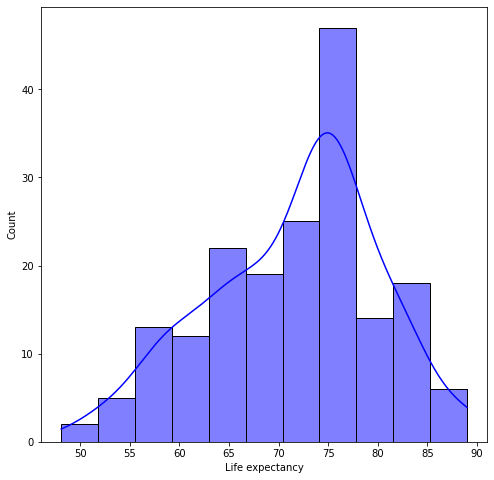

In [22]:
plt.figure(figsize=(8,8))
sns.histplot(df['Life expectancy'].dropna(), kde=True, color='blue')

   Here we have created a Scatter plot that represents all the countries included in our data set against the Life expectancy of each individual country in the year of 2014. We were able to only use the first three characters of the country so that it would be easy for readers to read each individual point on the scatter plot and for the analysis of these countries further on.
   
   In this Scatter Plot we can also see that the life expectancies of the 181 countries in our data set are very spread out based on their life expectancies and this is why this data set is perfect to work out so we can see the multiple reasons for why this is happening. Furthermore with this question of why do all the countries have different life expectancies, we can use statistical representations to show the answer in a readable way.


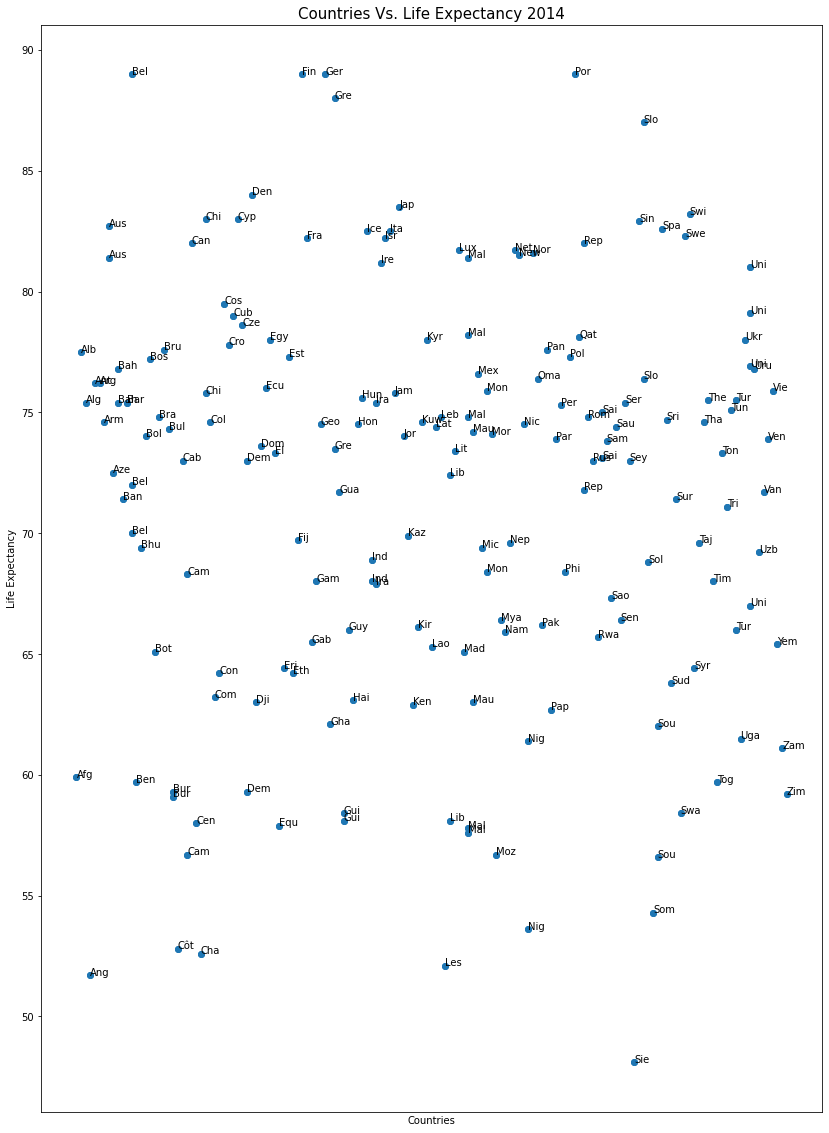

In [23]:
tempTable = df

tempTable['CountryInitial'] = tempTable['Country'].str[:3]

X = tempTable["CountryInitial"]

Y = tempTable["Life expectancy"]

#Set the size
plt.figure(figsize=(14,20))

#Create the scatterPlot
plt.scatter(X,Y)

#Label the X and Y axis
plt.xlabel("Countries")
plt.ylabel("Life Expectancy")

#Plot the data
plt.plot(X, Y, 'o')

plt.title("Countries Vs. Life Expectancy 2014",fontsize=15)

plt.xticks([])

#Add the label annotations for the teams
for i, label in enumerate(tempTable["CountryInitial"]):
    plt.annotate(label, (X[i], Y[i]))

   In this Diagram we can see the same output as the previous scatter plot but in a more visually appealing way for the readers to understand the dataset more properly.This model is represented in a bar plot and the seaborn import as SNS is used for statistical representation of the data. In addition as you can see SNS allows us to display colorful and visually pleasing statistical representations of our data.


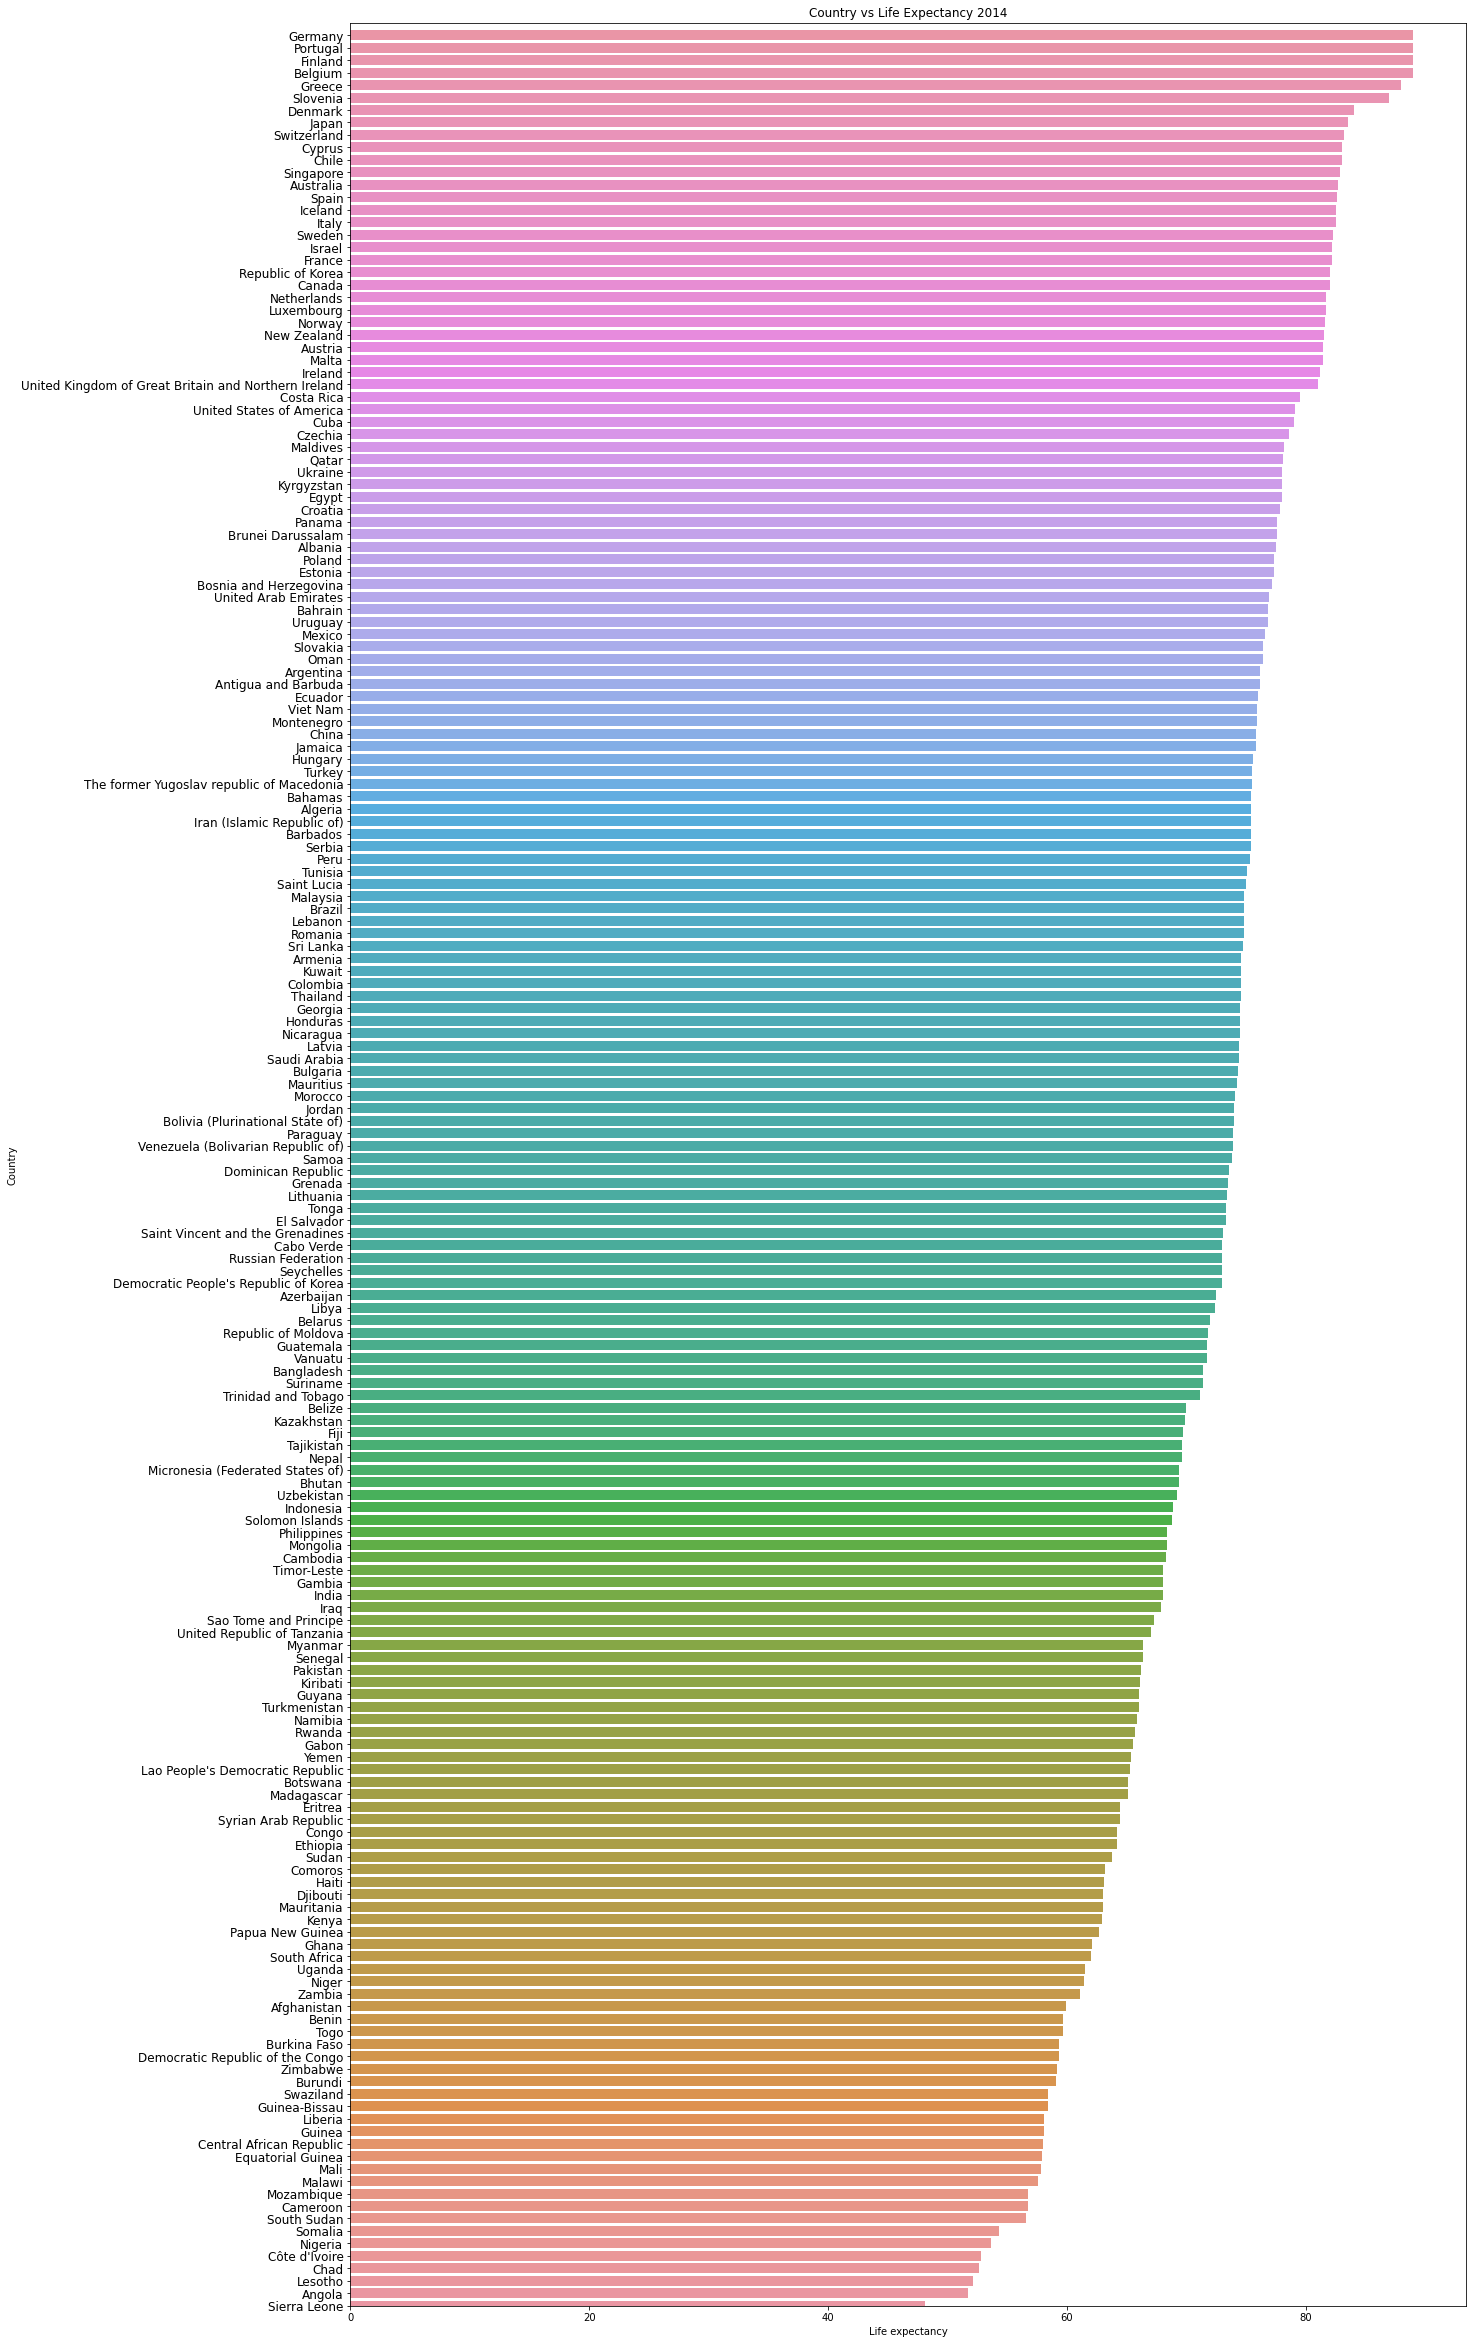

In [24]:
A_sorted = df.sort_values(["Life expectancy"], ascending=True)

plt.figure(figsize=(20,42))

X = A_sorted["Country"]

Y = A_sorted["Life expectancy"]

plt.tick_params(axis='y', labelsize=12)

sns.barplot(x=Y, y=X)

plt.title("Country vs Life Expectancy 2014")

plt.ylim([0,183])

plt.show()

This is a pie chart that shows the Devleoping vs Developed countries in our data set and shows how this can skewer the life expectancy. Furthermore, the resources one has in a developed compnay towards helath care will be more than one that is still wokring on its infrstructure.

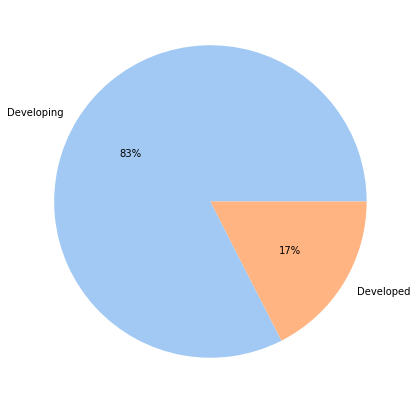

In [25]:
table = df['Status'].value_counts()

data = [table["Developing"],table["Developed"]]

labels = ["Developing", "Developed"]

plt.figure(figsize=(7,10))

colors = sns.color_palette('pastel')[0:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

plt.show()

 Once again for this model we have chosen to use a scatter plot to visually represent the Countries present vs the metric given for Schooling in the data set. It is easy to tell the the schooling metric for every country varies and this is a good variable to use to compare against life expectancy becasue of how much difference there is for the schooling of every country.It is very imortant to note teh reason we chose to display this model in a scatter plot and that is when there are relationships made further in the project it is easy to highlight which country and how high their school metric was.


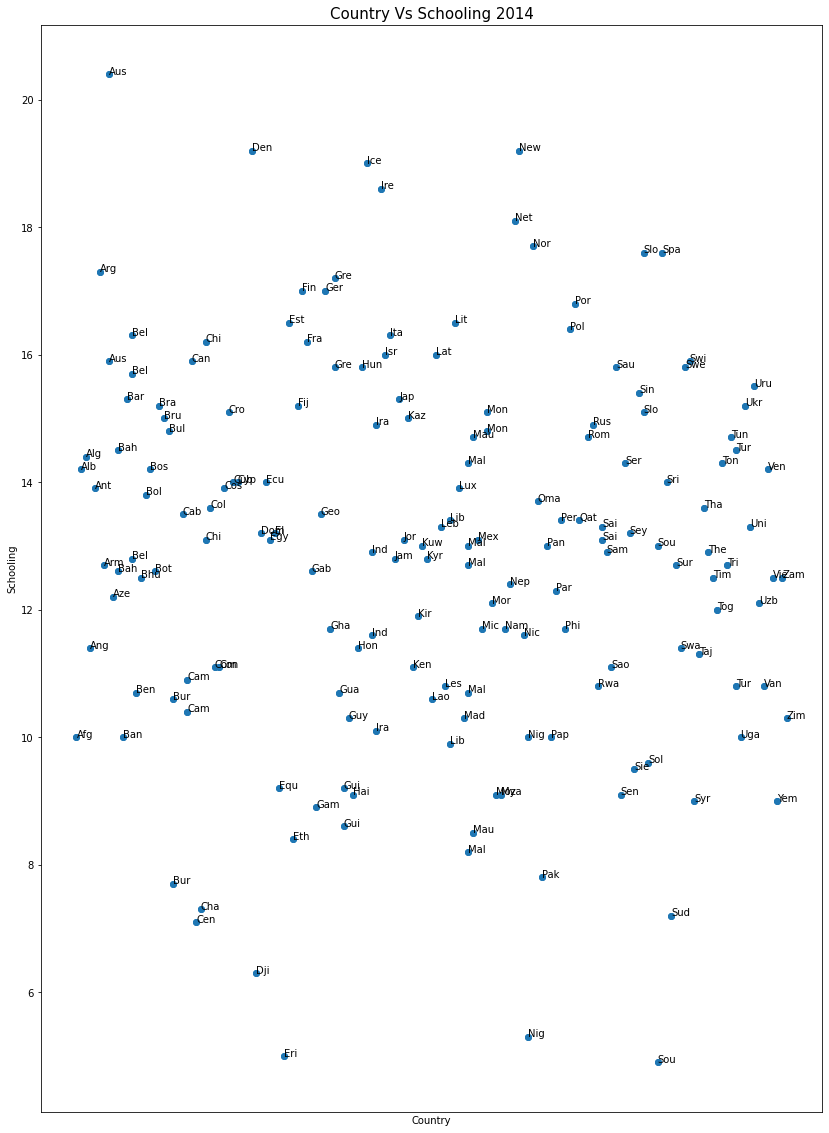

In [26]:
df['CountryInitial'] = df['Country'].str[:3]

X = df["CountryInitial"]

Y = df["Schooling"]

plt.figure(figsize=(14,20))

plt.scatter(X,Y)

plt.xlabel("Country")

plt.ylabel("Schooling")

plt.plot(X, Y, 'o')

plt.title("Country Vs Schooling 2014",fontsize=15)

plt.xticks([])

#Add the label annotations for the teams
for i, label in enumerate(df["CountryInitial"]):
    plt.annotate(label, (X[i], Y[i]))

After the previous graph of Country vs Schooling we decided that Schooling was not only a relevant variable but also a variable that would possibly have some meaning when compared to Life Expectancy. Consequently when we see this scatter plot we can see that their is not only a strong correlation between Life Expectancy and Schooling but their is also a positive one aswell. From this representation we are able to conclude that when a country has more schooling their life expectancy also changes in a positive way. This model was also a good fit for a          Linear Regression Line(LSRL) and this was plotted using the numpy library and calculating the slope and intercept for the line. Starting with this variable we begin to drop all the null values values where the cell is empty in the column using .notna().

Text(0.5, 1.0, 'Life Expectancy Vs. Schooling 2014')

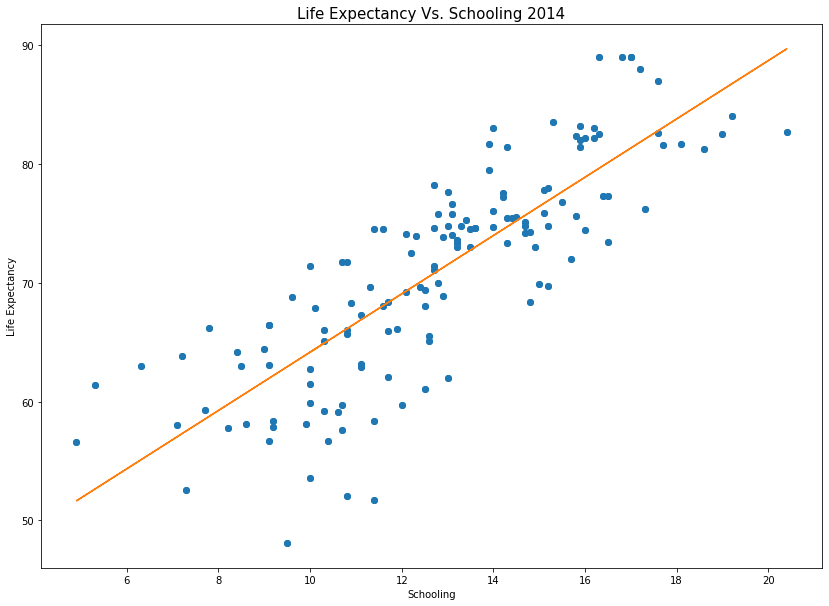

In [27]:
selectedTable = df[df['Population'].notna()]

X = selectedTable["Schooling"]

Y = selectedTable["Life expectancy"];

plt.figure(figsize=(14,10))

plt.scatter(X,Y)

plt.ylabel("Life Expectancy")

plt.xlabel("Schooling")

m, b = np.polyfit(X, Y, 1)

#Plot the data
plt.plot(X, Y, 'o')

#Plot the regression line
plt.plot(X, m*X + b)

plt.title("Life Expectancy Vs. Schooling 2014", fontsize=15)


 Another interesting variable in out data set was the Body Mass Index(BMI), according to studies from 2003 it is noted that obesity was one of the leading causes of death. Furthermore when we see the results of this scatter plot it was surprising for us too see another postive and strong correlation with another variabe in the data set. The idea that a higher BMI correlates to a higher life expectancy was totally unexpected but this can be explained by the fact that people with high BMI have higher nutrition.Also, the BMI is very well known to be a inaccurate representation of whether one is healthy.

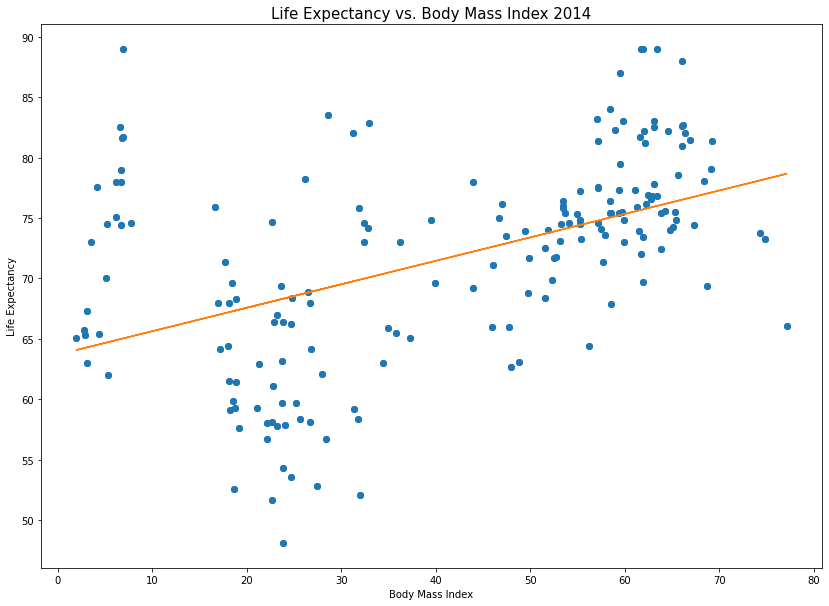

In [28]:
selectedTable = df[df['BMI'].notna()]

X = selectedTable["BMI"]

Y = selectedTable["Life expectancy"]

plt.figure(figsize=(14,10))

plt.scatter(X,Y)

plt.ylabel("Life Expectancy")

plt.xlabel("Body Mass Index")

m, b = np.polyfit(X, Y, 1)

#Plot the data
plt.plot(X, Y, 'o')

#Plot the regression line
plt.plot(X, m*X + b)

plt.title("Life Expectancy vs. Body Mass Index 2014",fontsize=15)

plt.show()

Alchohol was also another  interesting variable in out data set to compare next to life time expectancy becasue we clearly know alchol has a negative affect on your body but we wanted to make sure this was true. T our surprise the right part of the scatter plot includes many points that state the higher the alchohol count releastes to a higher life expectancy. In addition the datat points with 0 alchol and high life expectancy was predicited prior and makes sense. A regression line was shown just to show that it might not be the greatest representation of thsi data meaning that the correlation between Alchohol and Life Expectancy is weak.

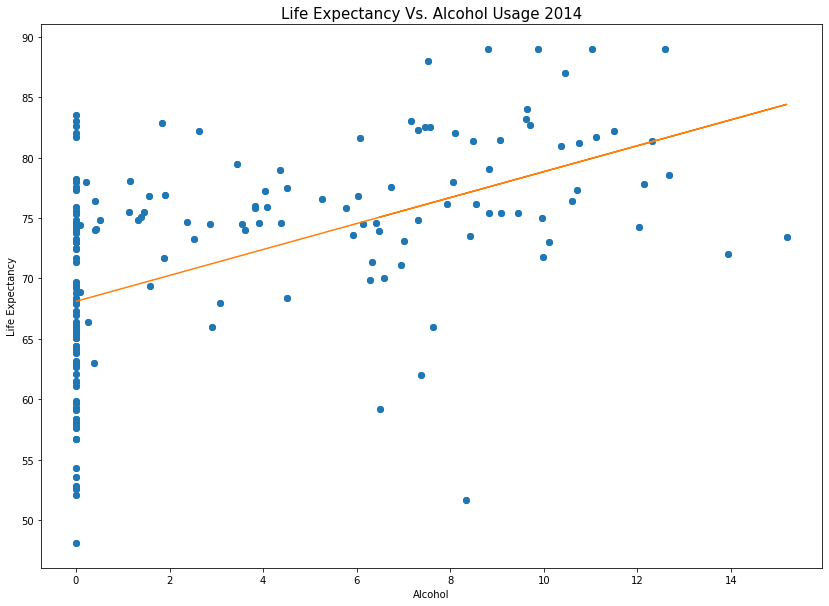

In [29]:
selectedTable = df[df['Alcohol'].notna()]

X = selectedTable["Alcohol"]

Y = selectedTable["Life expectancy"]

plt.figure(figsize=(14,10))

plt.scatter(X,Y)

plt.ylabel("Life Expectancy")

plt.xlabel("Alcohol")

m, b = np.polyfit(X, Y, 1)

#Plot the data
plt.plot(X, Y, 'o')

#Plot the regression line
plt.plot(X, m*X + b)

plt.title("Life Expectancy Vs. Alcohol Usage 2014",fontsize=15)

plt.show()

In this project we have decided to compare life expectancy to multiple diseases we have found in the data set to find a correlalaton between the two variable. We can see that the correlation is not only strong but also similiraly positive to the previous scatter plots. Furthermore, for this scatter plot we chose to not plot the regresion lines because the model does not fit to a linear model as much as it does to a logorithmic one.

Text(0.5, 1.0, 'Life Expectancy vs. Hepatitis B 2014')

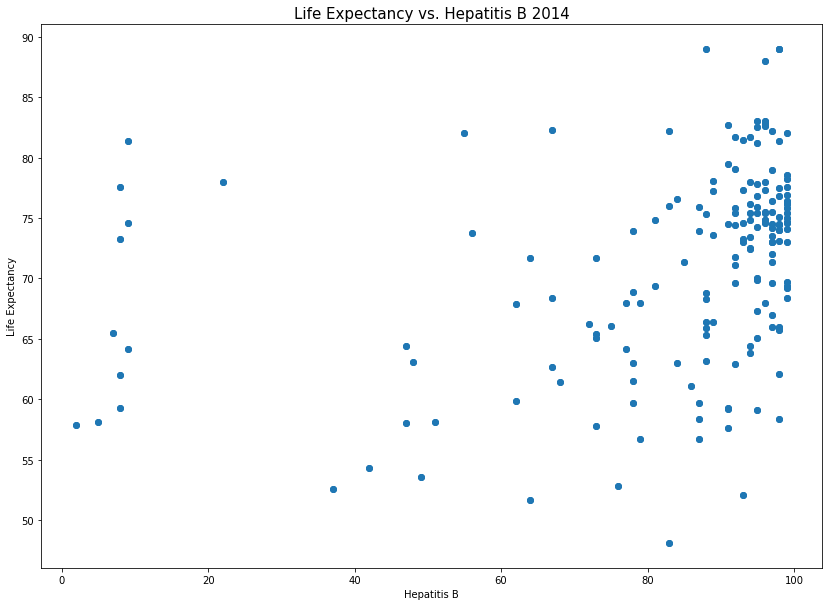

In [30]:
selectedTable = df[df['Hepatitis B'].notna()]

X = selectedTable["Hepatitis B"]

Y = selectedTable["Life expectancy"]

plt.figure(figsize=(14,10))

plt.scatter(X,Y)

plt.ylabel("Life Expectancy")

plt.xlabel("Hepatitis B")

m, b = np.polyfit(X, Y, 1)

#Plot the data
plt.plot(X, Y, 'o')


plt.title("Life Expectancy vs. Hepatitis B 2014",fontsize=15)


The next disease that was in the data set was Measles and this brought back a very surprising reveal in the scartter plot that we were not expecting. A lot of the data points were set to 0 amount of measles which means that disease was not as prevelant as some of the other diseases in this data set. However, one thing that can be understood from this plot is the fact that when one deos not have measles there is a high life time expectancy given in a higher volume aswell.

Text(0.5, 1.0, 'Life Expectancy vs. Measles 2014')

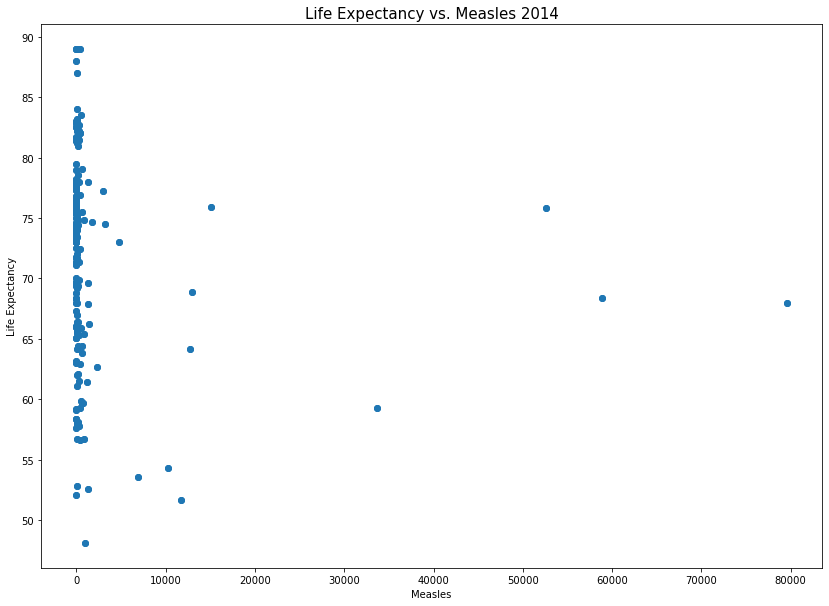

In [31]:
selectedTable = df[df['Measles'].notna()]

X = selectedTable["Measles"]

Y = selectedTable["Life expectancy"]

plt.figure(figsize=(14,10))

plt.scatter(X,Y)

plt.ylabel("Life Expectancy")

plt.xlabel("Measles")

m, b = np.polyfit(X, Y, 1)

#Plot the data
plt.plot(X, Y, 'o')

#Plot the regression line


plt.title("Life Expectancy vs. Measles 2014",fontsize=15)

The disease that is mentioned below Polio and this disease is very different from the Measles shown earlier becasuse we can once again see a strong correlation that is positive. Similar to the Measles scatter plot we can see thta a linear regression line would not fit the pattern of this curve as a logorithmic one will fit better.

Text(0.5, 1.0, 'Life Expectancy vs Polio 2014')

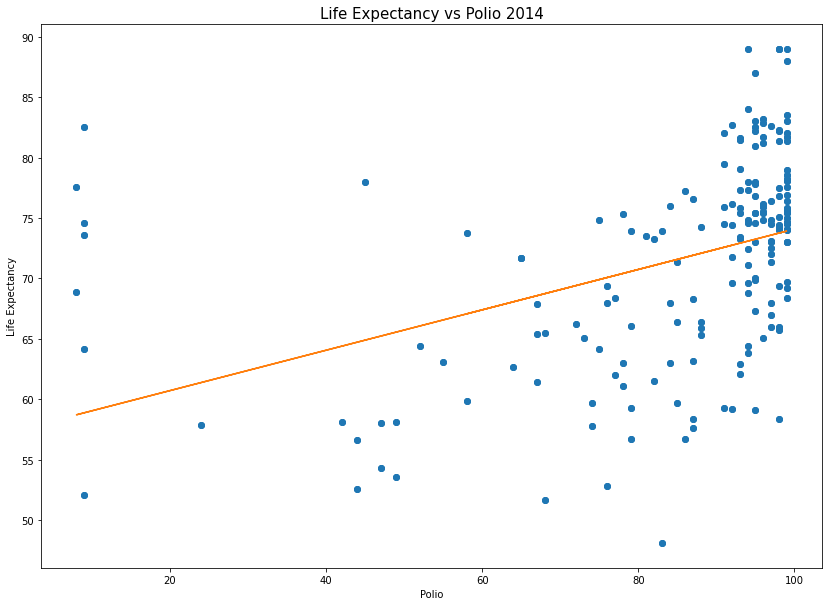

In [32]:
selectedTable = df[df['Polio'].notna()]

X = selectedTable["Polio"]

Y = selectedTable["Life expectancy"]

plt.figure(figsize=(14,10))

plt.scatter(X,Y)

plt.ylabel("Life Expectancy")

plt.xlabel("Polio")

m, b = np.polyfit(X, Y, 1)

#Plot the data
plt.plot(X, Y, 'o')

#Plot the regression line
plt.plot(X, m*X + b)

#Set the title
plt.title("Life Expectancy vs Polio 2014",fontsize=15)

#The following code represents the Countries over life expectancy for the given gap dataset

Based of the U.S National Library of Medicine I was able to tell that the spike in Polio and Diperthia had started to happen at around the same year. Furthermore when we take a kook at the scatte rplot that is revelaewd by Diperthia we are able to see many similairites in comparison to Polio and the spike at around the same time is the reason why.

Text(0.5, 1.0, 'Life Expectancy vs. Diphtheria 2014')

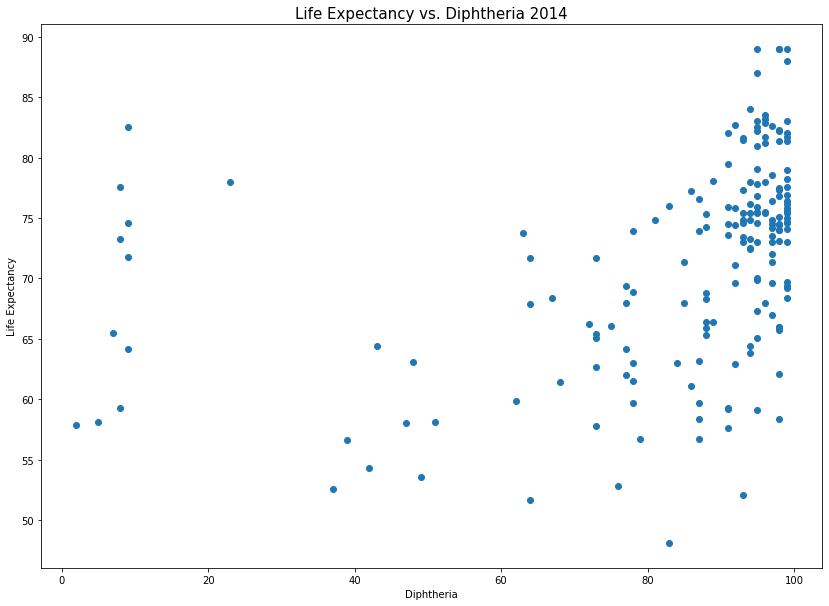

In [33]:
selectedTable = df[df['Diphtheria'].notna()]

X = selectedTable["Diphtheria"]

Y = selectedTable["Life expectancy"]

plt.figure(figsize=(14,10))

plt.scatter(X,Y)

plt.ylabel("Life Expectancy")

plt.xlabel("Diphtheria")

m, b = np.polyfit(X, Y, 1)

#Plot the data




plt.title("Life Expectancy vs. Diphtheria 2014",fontsize=15)


HIV/Aids is the first scatter plot that we see thta is accurate to what we had originally thought would be shown. We can clearly see that when the metric for HIV/AIDS is higher the life expectancy is shorter. Furthermore this can be explained by the fact that HIV/AIDS is not a curable disease and can only be treated. This scatter olot was also shown to have a weak relationship but it was properly negative as the regression line plotted also has a negative slope.

Text(0.5, 1.0, 'Life Expectancy vs. HIV/AIDS')

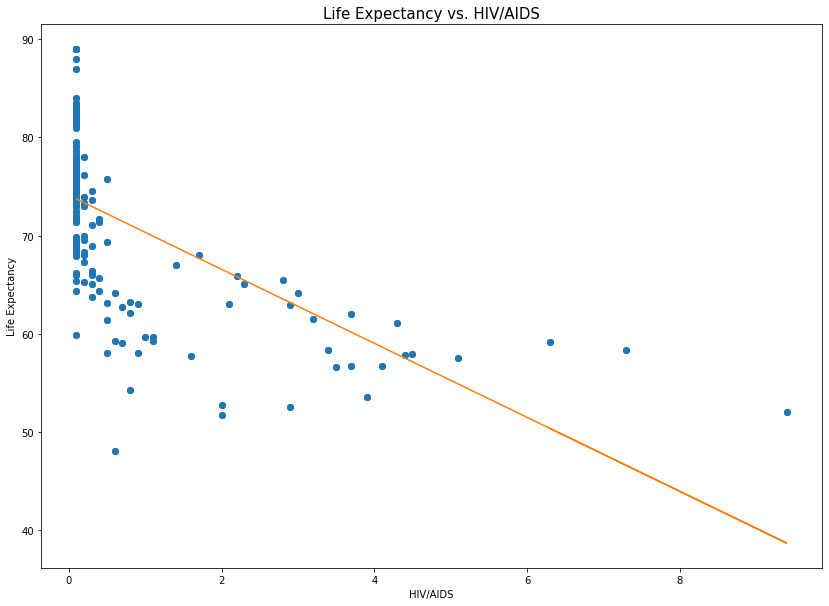

In [34]:
selectedTable = df[df['HIV/AIDS'].notna()]

X = selectedTable["HIV/AIDS"]

Y = selectedTable["Life expectancy"]

plt.figure(figsize=(14,10))

plt.scatter(X,Y)

plt.ylabel("Life Expectancy")

plt.xlabel("HIV/AIDS")

m, b = np.polyfit(X, Y, 1)

#Plot the data
plt.plot(X, Y, 'o')

#Plot the regression line
plt.plot(X, m*X + b)

plt.title("Life Expectancy vs. HIV/AIDS",fontsize=15)


In this secton we decided to see what would happen if we added all the diseases that showed a strong and positive relationship to life expectancy. So, we noticed that when we averaged these metrics of Disease together and compared them to Life Expectancy once again it showed more of a linear relarion ship that was stronger. We would explain this by immunity once a person has gotten a disease they will be stronger in the future if cured the first time.

Text(0.5, 1.0, 'Life Expectancy vs. Positive Disease Sum 2014')

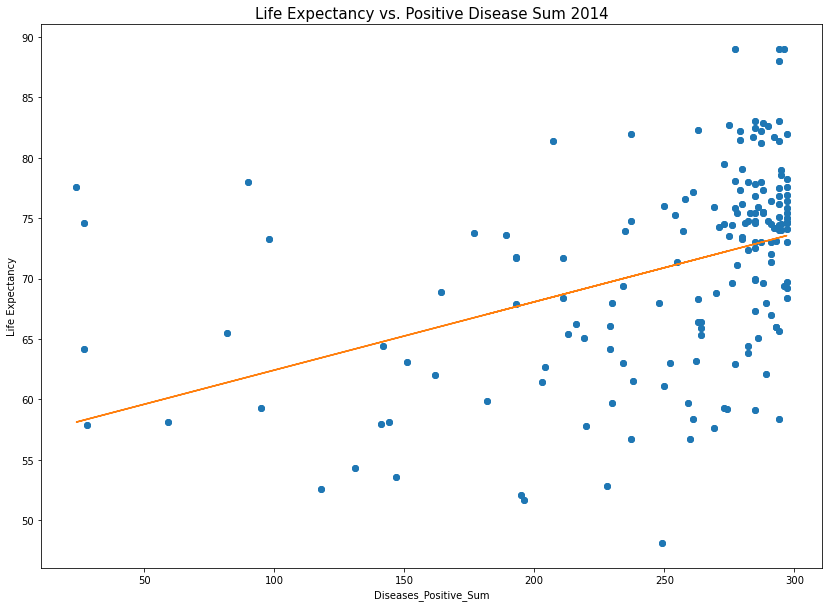

In [35]:
#Excluded Measeals because it showed to be an disease where the less of it showed a lower life expectancy.

sum_column = df['Hepatitis B'] + df["Polio"] + df['Diphtheria']

df["Disease_Positive_Sum"] = sum_column

selectedTable = df[df["Disease_Positive_Sum"].notna()]

X = selectedTable["Disease_Positive_Sum"]

Y = selectedTable["Life expectancy"]

plt.figure(figsize=(14,10))

plt.scatter(X,Y)

plt.ylabel("Life Expectancy")

plt.xlabel("Diseases_Positive_Sum")

m, b = np.polyfit(X, Y, 1)

#Plot the data
plt.plot(X, Y, 'o')

#Plot the regression line
plt.plot(X, m*X + b)

plt.title("Life Expectancy vs. Positive Disease Sum 2014",fontsize=15)


# 4 Machine Learning Model


## 4.1  Machine Learning Data Set
We decided that the variable we will train is life expectancy becasue throughout the entire project we wanted to see how other variables would change this. This particular data set that we will use to train our variable will drop all of the other columns that were used in the first data set but include every column that was used ijn this project thereafter.

## 4.2 Linear Regression Model

For our machine learning model we chose to use a Linear Regression. The purpose is to find a line with the Least Sum of Residuals. Residuals are the distance a point is vertically from the regression line and this is how we will train out data to predict future data points. We can easily tell.By computing the confience score that a linear regression model was perfect for this data set as the error is less than .4.

In [36]:
#Repull in all the data

df = pd.read_csv('Life Expectancy Data.csv')

df.rename(columns = {"Life expectancy ": "Life expectancy"}, inplace=True)

selectedTable = df[df['Life expectancy'].notna()]

selectedTable.dropna(inplace=True)

target = selectedTable['Life expectancy']

df.drop(df.columns[len(df.columns)-3], axis=1, inplace=True)

df.drop(df.columns[len(df.columns)-3], axis=1, inplace=True)

df.drop(["infant deaths", "Year", "Adult Mortality", "percentage expenditure", "under-five deaths ", "Total expenditure", "Income composition of resources"], axis=1, inplace=True)

features = selectedTable[selectedTable.columns.difference(['Life expectancy'])]

x_train, x_test, y_train, y_test = train_test_split(pd.get_dummies(features), target, test_size=0.2)

linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

linear_model_confidence = linear_model.score(x_test, y_test)

print("Confidence Score: ", linear_model_confidence)


Confidence Score:  0.9531738048727619


# Conclusion
To conclude, we have succesfully learned from this project the multiple different variables that affected humans lifespan in the year of 2014. It can be easily seen from the graphical represnetations that multiple factors such as schooling,alchol levels, diseases, and Devloping process can change the life expectancy of a given country. The machine training model also suggested that a Linear approach for this data set was correct which makes our hypothesis hold true and machine learning model hold true for a correlation between the data and life expectancy.

Work Cited
https://www.cdc.gov/nchs/products/databriefs/db267.htm 

https://covid19.who.int 

https://www.npr.org/sections/health-shots/2016/12/08/504667607/life-expectancy-in-u-s-drops-for-first-time-in-decades-report-finds 


https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5401682/ 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4151714/ 
